# Central Limit Theorm

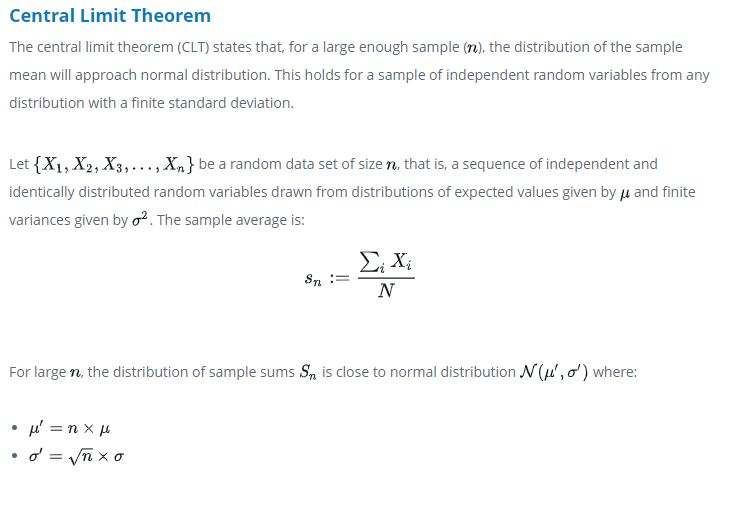

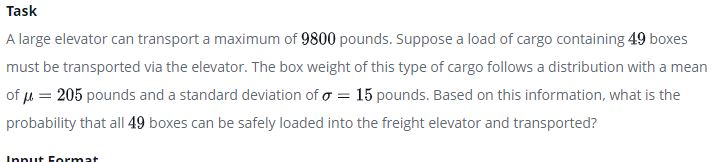

In [ ]:
# Answer in R 
#out <- pnorm(9800, mean = (205 *49), sd = 15 * sqrt(49))
#cat (round (out,4))

In [1]:
from math import erf
mean, std, n_samples, sample = 205, 15, 49, 9800
sample_mean, sample_std = n_samples * mean, (n_samples**.5) * std

cdf = lambda x: .5 + .5 * erf((x - sample_mean)/2**.5/sample_std)
print(round(cdf(sample), 4))

0.0098


In [2]:
# ___ by numerical integration ___ #
def normal_pdf(x, mu, sigma):
    e = 2.71828
    pi = 3.14159
    var = sigma**2
    error = (x-mu)**2
    nom = e**(-error/(2*var))
    denom = sigma*(2*pi)**0.5
    return nom / denom

def integrate_normal(a, b, n, mu, sigma):
    dx = float(b-a)/n
    area = 0.
    midpoint = a + (dx/2)
    for _ in range(n):
        area += normal_pdf(midpoint, mu, sigma) * dx
        midpoint += dx
    return area

# ___ using CDF and math module ___ #
import math
cdf = lambda x,mu,sigma: (1. + math.erf((x - mu) / (math.sqrt(2.)*sigma))) * 0.5

# ___ main ___ #
w_max = 9800
num_boxes = 49

# box: distribution parameters
mu, sigma = 205, 15 

# sum of boxes: distribution parameters
muS, sigmaS = mu*num_boxes, sigma*(num_boxes**0.5)

p_by_cdf = cdf(w_max, mu*num_boxes, sigma*math.sqrt(num_boxes)) - cdf(0, mu*num_boxes, sigma*math.sqrt(num_boxes))
p_by_int = integrate_normal(0, w_max, 1000, mu*num_boxes, sigma*(num_boxes**0.5))

assert round(p_by_cdf,4) == round(p_by_int,4)
print(round(p_by_cdf, 4))


0.0098


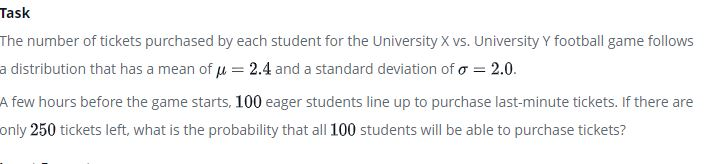

In [3]:
import math
x = 250
n = 100
sampling_mean = 2.4
sampling_stdev = 2.0
stdev = sampling_stdev * math.sqrt(n)

cdf = 0.5 * (1 + math.erf((x - sampling_mean * n) / (stdev * math.sqrt(2))))

print(round(cdf,4))

0.6915


In [4]:
from math import erf
cdf = lambda x,mu,sig : (1/2)*(1+erf((x-mu)/(sig*(2**(1/2)))))
tl = 250
n = 100
mu = 2.4
sig = 2
print("%.4f"%cdf(250,n*mu,sig*(n**(1/2))))

0.6915


In [6]:
#"Solution in Python3

from math import sqrt, erf

dec = 4

def cum_prob(z: float) -> float:
    return 0.5 * (1 + erf(z / sqrt(2)))

maximum = 250
avg = 2.4
std = 2
n = 100

z = (maximum - n * avg) / (sqrt(n) * std)

print(
    round(
        cum_prob(z),
        dec
    )
)


0.6915


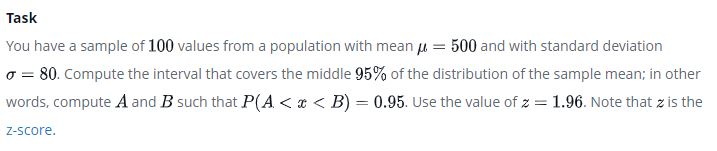

In [11]:
# true population distribution
mu, sigma = 500, 80

# sample mean distribution
muS, sigmaS = mu, sigma/(100**0.5)

# confidence intervals of sample mean dist
A = mu - (1.96*sigmaS)
B = mu + (1.96*sigmaS)

print(round(A,2))
print(round(B,2))

484.32
515.68


In [10]:
from math import sqrt

s = int(input())
mean = int(input())
std = int(input())
interval = float(input())
z = float(input())
print(round(mean - (std / sqrt(s)) * z, 2))
print(round(mean + (std / sqrt(s)) * z, 2))

100
500
80
.95
1.96
484.32
515.68


### 